## Predicting Diabetes with Logistic Regression

In [2]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn import tree

In [3]:
# Read the dataset

df = pd.read_csv('/Users/ashleysmacbook/Desktop/Project-4/diabetes_binary_health_indicators_BRFSS2015.csv')

# Display the first few rows of the dataset
print(df.head())

# Explore basic statistics and information about the dataset
print(df.describe())
print(df.info())


   Diabetes_binary  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                0       1         1          1   40       1       0   
1                0       0         0          0   25       1       0   
2                0       1         1          1   28       0       0   
3                0       1         0          1   27       0       0   
4                0       1         1          1   24       0       0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                     0             0       0  ...              1   
1                     0             1       0  ...              0   
2                     0             0       1  ...              1   
3                     0             1       1  ...              1   
4                     0             1       1  ...              1   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  \
0            0        5        18        15         1    0    9          4

In [4]:
# Drop any missing values
df = df.dropna()

# Split the dataset into features (X) and target variable (y)
X = df.drop('Diabetes_binary', axis=1)  
y = df['Diabetes_binary']


In [5]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Standardize using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
#Logistic regression model 
model = LogisticRegression(random_state=42)

#train the model
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)


In [8]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')

# Mean squared error (MSE) and R-squared (R2)
from sklearn.metrics import mean_squared_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')


Accuracy: 0.8658940397350994
Confusion Matrix:
 [[42775   964]
 [ 5840  1157]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.55      0.17      0.25      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

ROC-AUC Score: 0.8263596542959626
Mean Squared Error: 0.13410596026490065
R-squared (R2): -0.12797586204103384


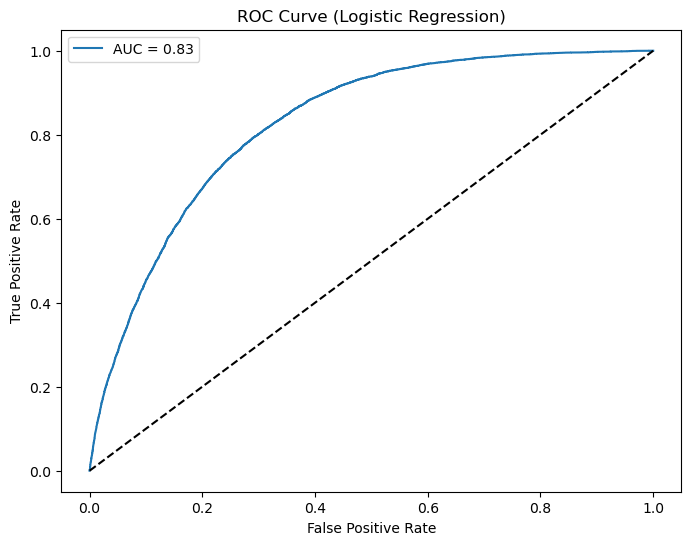

In [9]:
from sklearn.metrics import roc_curve

# Calculate ROC curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend()
plt.show()



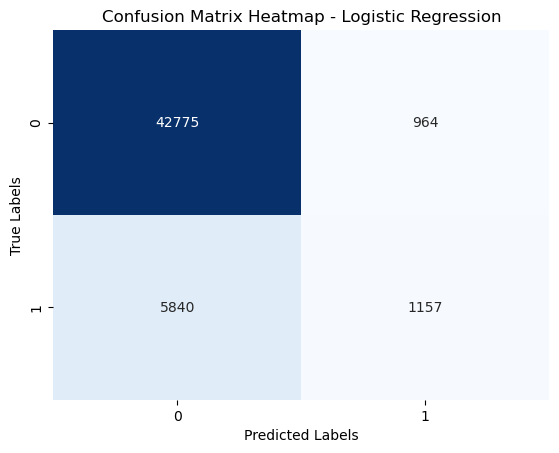

In [10]:
# # Visualize the confusion matrix as a heatmap using seaborn
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



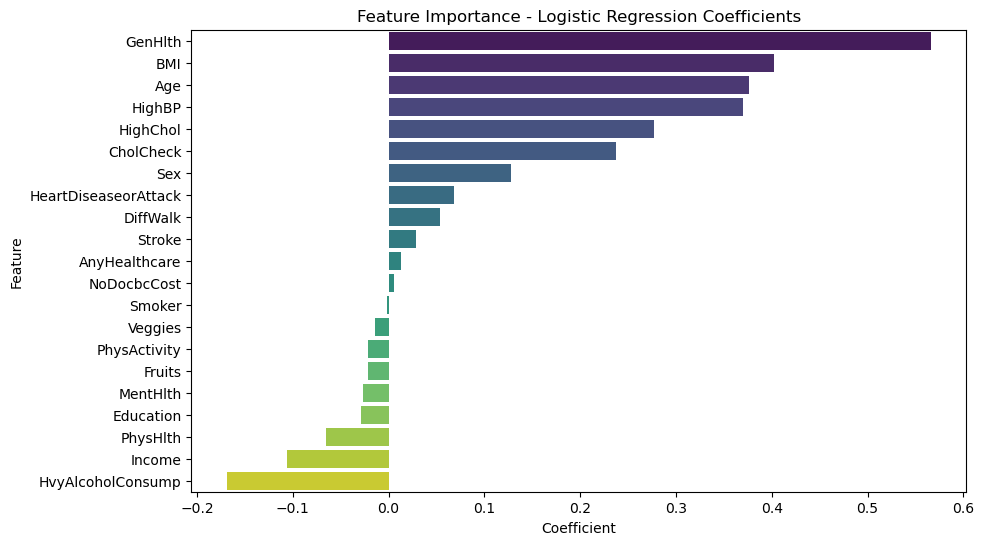

In [11]:
# Create a DataFrame to organize the coefficients of the logistic regression model
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})

# Sort the DataFrame based on coefficient values in descending order
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# Visualize feature importance by plotting coefficients as a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importance - Logistic Regression Coefficients')
plt.show()


